<a href="https://colab.research.google.com/github/Ibarra1812/StoreChallange/blob/main/StoreAluraEntrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [33]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359




#1. Análisis de facturación



## 1) Ingreso total por cada tienda.

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [32]:
import pandas as pd

# --- Cargar y combinar los datos desde las URLs ---

try:
    # Cargar los archivos CSV en DataFrames usando las URLs
    url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
    url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
    url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
    url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

    df1 = pd.read_csv(url1)
    df2 = pd.read_csv(url2)
    df3 = pd.read_csv(url3)
    df4 = pd.read_csv(url4)

    # Añadi una columna para identificar cada tienda
    df1['Tienda'] = 'Tienda 1'
    df2['Tienda'] = 'Tienda 2'
    df3['Tienda'] = 'Tienda 3'
    df4['Tienda'] = 'Tienda 4'

    # Combinacion de todos los DataFrames
    df_total = pd.concat([df1, df2, df3, df4], ignore_index=True)

    print("Datos cargados y combinados exitosamente.")
    print(f"Total de registros: {df_total.shape[0]}")

except Exception as e:
    print(f"Ocurrió un error al cargar los datos: {e}")

Datos cargados y combinados exitosamente.
Total de registros: 9435


In [9]:
#1# Cálculo de Ingresos Totales

# Agrupe por 'Tienda', seleccione 'Precio' y calculamos la suma
ingresos_por_tienda = df_total.groupby('Tienda')['Precio'].sum()

# Muestreo del resultado del cálculo
print("Ingresos totales por tienda:")
print(ingresos_por_tienda)

Ingresos totales por tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


<Axes: title={'center': 'Ingresos Totales por Tienda'}, ylabel='Tienda'>

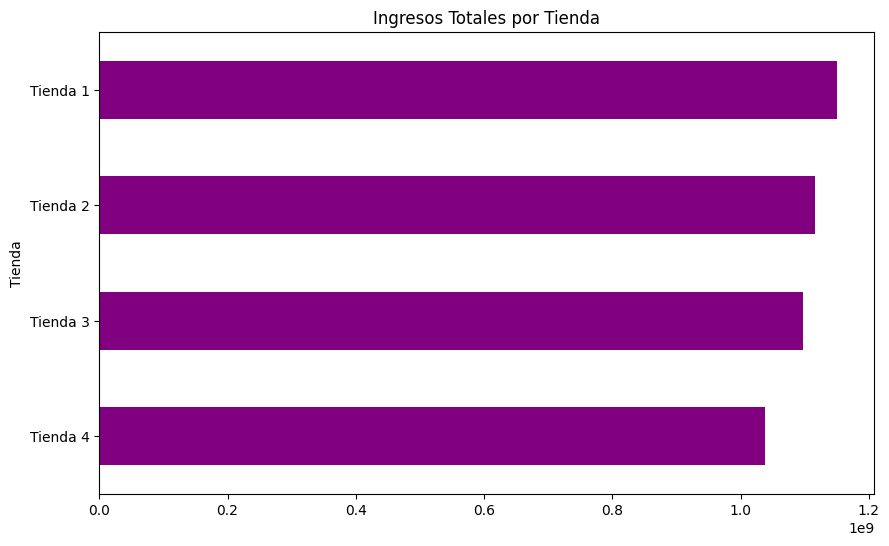

In [10]:
#1# Gráfico de Ingresos Totales

# Ordenacion los valores (sort_values) para que el gráfico se vea mejor
ingresos_por_tienda_sorted = ingresos_por_tienda.sort_values()

# Creacion del gráfico de barras horizontales (barh)
ingresos_por_tienda_sorted.plot(
    kind='barh',
    figsize=(10, 6),
    color='purple',
    title='Ingresos Totales por Tienda'
)

In [11]:
#1# Guardar Resultados

# Usamos .to_csv para guardar la serie 'ingresos_por_tienda'
# Mantenemos el índice (Tienda) como la primera columna
ingresos_por_tienda.to_csv('ingresos_por_tienda.csv')

print("Resultados guardados en 'ingresos_por_tienda.csv'")

Resultados guardados en 'ingresos_por_tienda.csv'


## 2. Ventas por categoría
En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [12]:
#2# Cálculo de Ventas por Categoría

# Agrupo por 'Tienda' y 'Categoría del Producto', luego cuento las ventas (filas)
ventas_categoria_tienda = df_total.groupby(['Tienda', 'Categoría del Producto']).size()

# Conversion de la Serie resultante a un DataFrame (to_frame)
# y le cambio el nombre a la columna de conteo (rename)
ventas_categoria_tienda_df = ventas_categoria_tienda.to_frame(name='Numero de Ventas')

# Muestreo del resultado
print("Ventas por Categoría y Tienda:")
print(ventas_categoria_tienda_df)

Ventas por Categoría y Tienda:
                                  Numero de Ventas
Tienda   Categoría del Producto                   
Tienda 1 Artículos para el hogar               171
         Deportes y diversión                  284
         Electrodomésticos                     312
         Electrónicos                          448
         Instrumentos musicales                182
         Juguetes                              324
         Libros                                173
         Muebles                               465
Tienda 2 Artículos para el hogar               181
         Deportes y diversión                  275
         Electrodomésticos                     305
         Electrónicos                          422
         Instrumentos musicales                224
         Juguetes                              313
         Libros                                197
         Muebles                               442
Tienda 3 Artículos para el hogar               177


<Axes: title={'center': 'Top 5 Categorías más Vendidas por Tienda'}, ylabel='Categoría del Producto'>

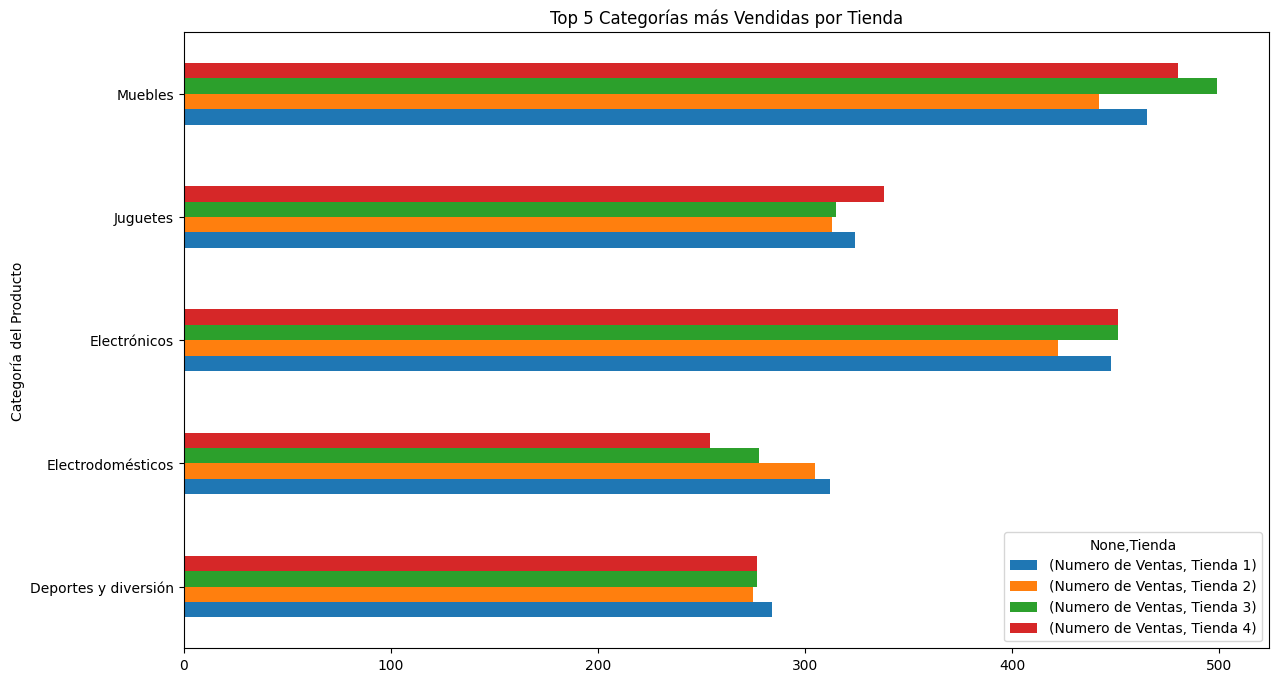

In [30]:
#2# Gráfico de Ventas (Categorías más vendidas)

# 1. Calculo del total de ventas por categoría (sumando cada una de las tiendas)
total_ventas_categoria = df_total.groupby('Categoría del Producto').size()

# 2. Orden de valores (sort_values) y nos quedamos con las 5 categorías principales (head)
top_5_categorias = total_ventas_categoria.sort_values(ascending=False).head(5)

# 3. Filtro el DataFrame 'ventas_categoria_tienda_df' para incluir SÓLO esas 5 categorías
# Usamos .index.get_level_values(1) para acceder a la 'Categoría del Producto'
filtro_top_5 = ventas_categoria_tienda_df[ventas_categoria_tienda_df.index.get_level_values(1).isin(top_5_categorias.index)]


# 4. Graficamos
# 'unstack()' reorganiza los datos para que las Tiendas sean el eje X
# y las categorías sean barras agrupadas.
filtro_top_5.unstack(level=0).plot(
    kind='barh',
    figsize=(14, 8),
    title='Top 5 Categorías más Vendidas por Tienda'
)

In [15]:
#2# Guardar Resultados

# Se guarda el DataFrame en 'ventas_categoria_tienda_df'
ventas_categoria_tienda_df.to_csv('ventas_por_categoria_tienda.csv')

print("Resultados guardados en 'ventas_por_categoria_tienda.csv'")

Resultados guardados en 'ventas_por_categoria_tienda.csv'


## 3) Valoración media por Tienda

En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [16]:
#3# Cálculo de Valoración Media por Tienda

# Se agrupa por 'Tienda', selecciono la columna 'Calificación'
# y calculamos la media (mean)
valoracion_media_tienda = df_total.groupby('Tienda')['Calificación'].mean()

# Se muestra el resultado del cálculo
print("Valoración media por tienda:")
print(valoracion_media_tienda)

Valoración media por tienda:
Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


<Axes: title={'center': 'Valoración Media de Clientes por Tienda'}, ylabel='Tienda'>

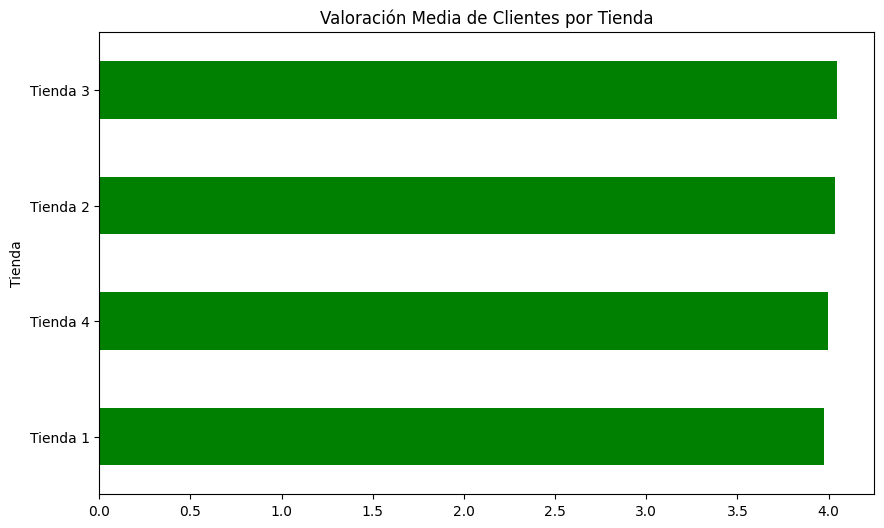

In [17]:
#3# Gráfico de Valoración Media

# Se ordena los valores (sort_values) para que el gráfico sea más fácil de leer
valoracion_media_tienda_sorted = valoracion_media_tienda.sort_values()

# Creamos el gráfico de barras horizontales (barh)
valoracion_media_tienda_sorted.plot(
    kind='barh',
    figsize=(10, 6),
    color='green',
    title='Valoración Media de Clientes por Tienda'
)

In [18]:
#3# Guardar Resultados

# Uso .to_csv para guardar la serie 'valoracion_media_tienda'
valoracion_media_tienda.to_csv('valoracion_media_tienda.csv')

print("Resultados guardados en 'valoracion_media_tienda.csv'")

Resultados guardados en 'valoracion_media_tienda.csv'


## 4) Productos más vendidos y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [31]:
#4# Cálculo de Productos Más y Menos Vendidos

# 1. Agrupamos por Tienda y Producto, contamos las ventas (size) y convertimos a DataFrame (to_frame)
ventas_producto_tienda = df_total.groupby(['Tienda', 'Producto']).size().to_frame(name='Numero de Ventas')

# 2. MÁS VENDIDOS: Ordenamos (sort_values) por Tienda y Nro de Ventas (descendente)
#    y nos quedamos con el primero (head(1)) de cada grupo (Tienda)
mas_vendidos = ventas_producto_tienda.sort_values(by=['Tienda', 'Numero de Ventas'], ascending=[True, False]).groupby('Tienda').head(1)

# 3. MENOS VENDIDOS: Ordenamos (sort_values) por Tienda y Nro de Ventas (ascendente)
#    y nos quedamos con el primero (head(1)) de cada grupo (Tienda)
menos_vendidos = ventas_producto_tienda.sort_values(by=['Tienda', 'Numero de Ventas'], ascending=[True, True]).groupby('Tienda').head(1)


# Muestreo de los resultados
print("--- Productos MÁS vendidos por tienda ---")
print(mas_vendidos)
print("\n" + "--- Productos MENOS vendidos por tienda ---")
print(menos_vendidos)

--- Productos MÁS vendidos por tienda ---
                                    Numero de Ventas
Tienda   Producto                                   
Tienda 1 Armario                                  60
Tienda 2 Iniciando en programación                65
Tienda 3 Kit de bancas                            57
Tienda 4 Cama box                                 62

--- Productos MENOS vendidos por tienda ---
                                    Numero de Ventas
Tienda   Producto                                   
Tienda 1 Auriculares con micrófono                33
Tienda 2 Juego de mesa                            32
Tienda 3 Bloques de construcción                  35
Tienda 4 Guitarra eléctrica                       33


<Axes: title={'center': 'Productos MÁS Vendidos por Tienda'}, ylabel='Etiqueta'>

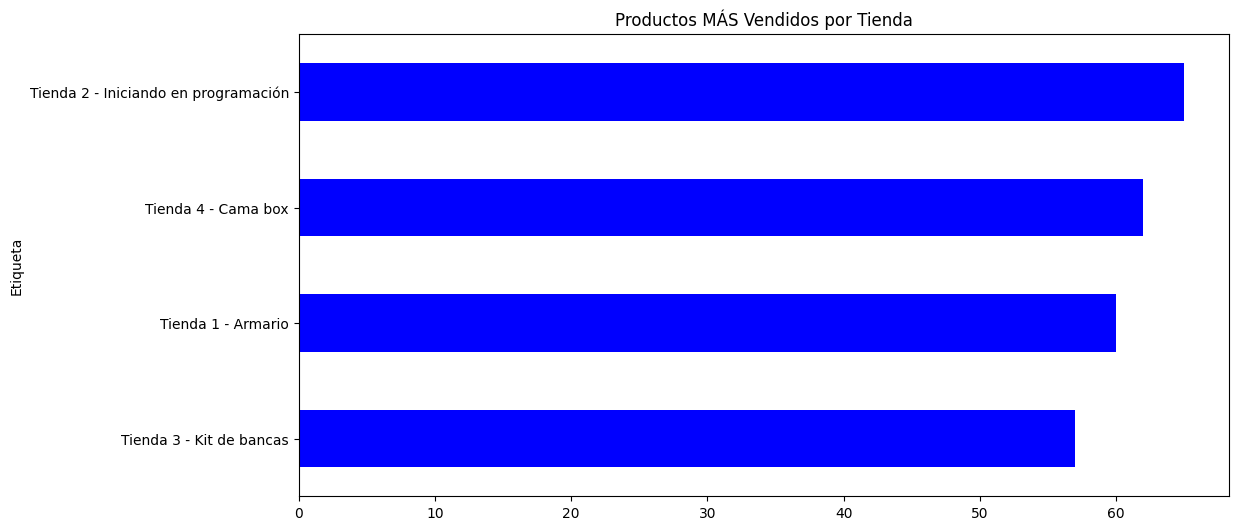

In [20]:
#4# Gráfico - Productos MÁS Vendidos

# Use reset_index() para convertir los índices (Tienda, Producto) en columnas
mas_vendidos_plot = mas_vendidos.reset_index()

# Cree una nueva columna 'Etiqueta' para el gráfico
mas_vendidos_plot['Etiqueta'] = mas_vendidos_plot['Tienda'] + ' - ' + mas_vendidos_plot['Producto']

# Use la 'Etiqueta' como índice, ordenamos (sort_values) y graficamos
mas_vendidos_plot.set_index('Etiqueta')['Numero de Ventas'].sort_values().plot(
    kind='barh',
    title='Productos MÁS Vendidos por Tienda',
    figsize=(12, 6),
    color='blue'
)

<Axes: title={'center': 'Productos MENOS Vendidos por Tienda'}, ylabel='Etiqueta'>

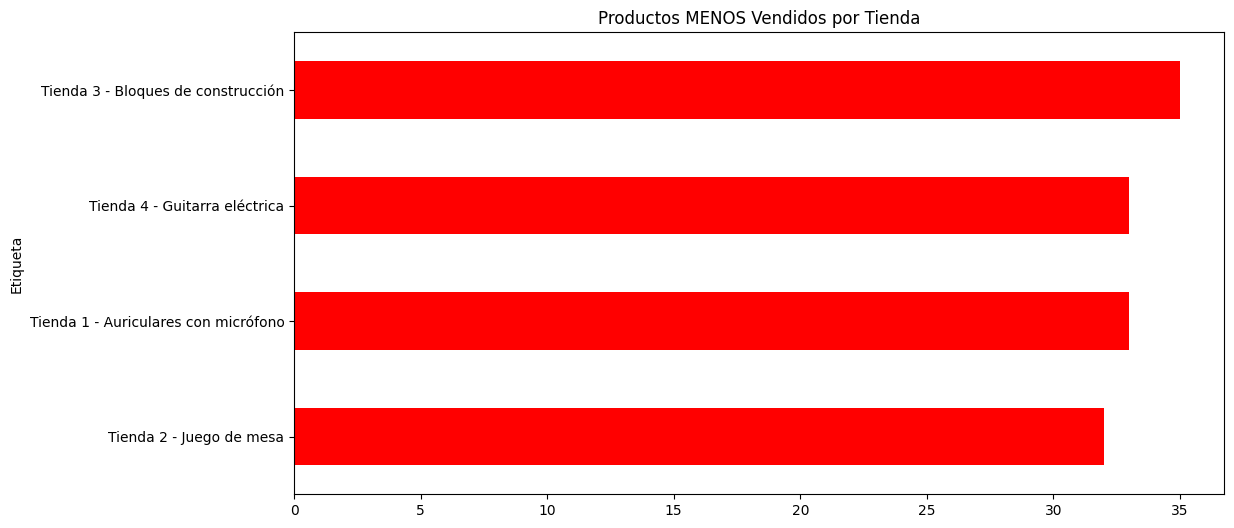

In [21]:
#4# Gráfico - Productos MENOS Vendidos

# Use reset_index() para convertir los índices (Tienda, Producto) en columnas
menos_vendidos_plot = menos_vendidos.reset_index()

# Cree una nueva columna 'Etiqueta' para el gráfico
menos_vendidos_plot['Etiqueta'] = menos_vendidos_plot['Tienda'] + ' - ' + menos_vendidos_plot['Producto']

# Use la 'Etiqueta' como índice, luego ordeno (sort_values) y grafico el resultado
menos_vendidos_plot.set_index('Etiqueta')['Numero de Ventas'].sort_values().plot(
    kind='barh',
    title='Productos MENOS Vendidos por Tienda',
    figsize=(12, 6),
    color='red'
)

In [22]:
#4# Guardado Resultados

# Se guarda los DataFrames de más y menos vendidos
mas_vendidos.to_csv('productos_mas_vendidos.csv')
menos_vendidos.to_csv('productos_menos_vendidos.csv')

print("Resultados guardados en 'productos_mas_vendidos.csv' y 'productos_menos_vendidos.csv'")

Resultados guardados en 'productos_mas_vendidos.csv' y 'productos_menos_vendidos.csv'


## 5) Valor del envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda. Sabiendo que el cliente paga el envío.

In [23]:
#5# Cálculo de Envío Promedio por Tienda

# Agrupo por 'Tienda', seleccionamos la columna 'Costo de envío'
# y calculamos la media (mean)
envio_promedio_tienda = df_total.groupby('Tienda')['Costo de envío'].mean()

# Mostramos el resultado del cálculo
print("Costo de envío promedio por tienda:")
print(envio_promedio_tienda)

Costo de envío promedio por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


<Axes: title={'center': 'Costo de Envío Promedio por Tienda'}, ylabel='Tienda'>

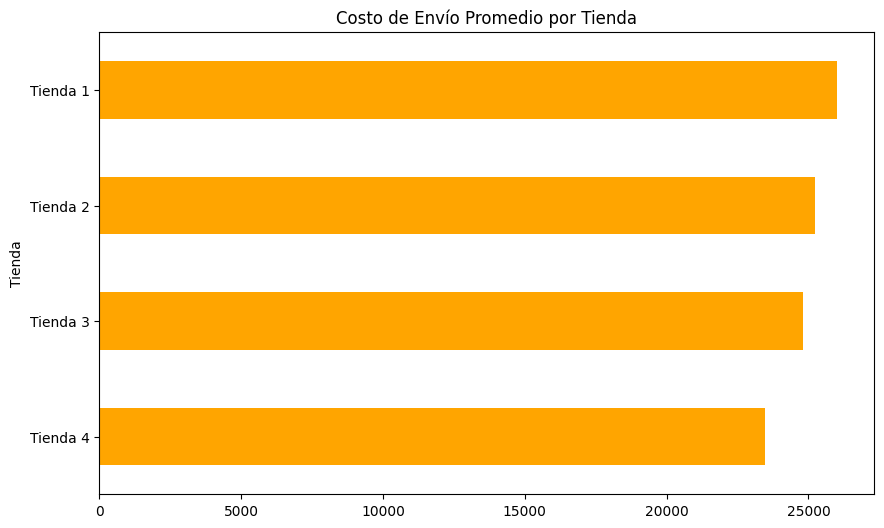

In [24]:
#5# Gráfico de Envío Promedio

# Ordenamos los valores (sort_values) para que el gráfico sea más fácil de leer
envio_promedio_tienda_sorted = envio_promedio_tienda.sort_values()

# Creamos el gráfico de barras horizontales (barh)
envio_promedio_tienda_sorted.plot(
    kind='barh',
    figsize=(10, 6),
    color='orange',
    title='Costo de Envío Promedio por Tienda'
)

In [25]:
#5# Guardar Resultados

# Use .to_csv para guardar la serie 'envio_promedio_tienda'
envio_promedio_tienda.to_csv('envio_promedio_tienda.csv')

print("Resultados guardados en 'envio_promedio_tienda.csv'")

Resultados guardados en 'envio_promedio_tienda.csv'


# 2) Visualización de Resultados

Después de realizar los análisis, es hora de transformar sus resultados en visualizaciones.

<Axes: title={'center': 'Ingresos Totales por Tienda'}, ylabel='Tienda'>

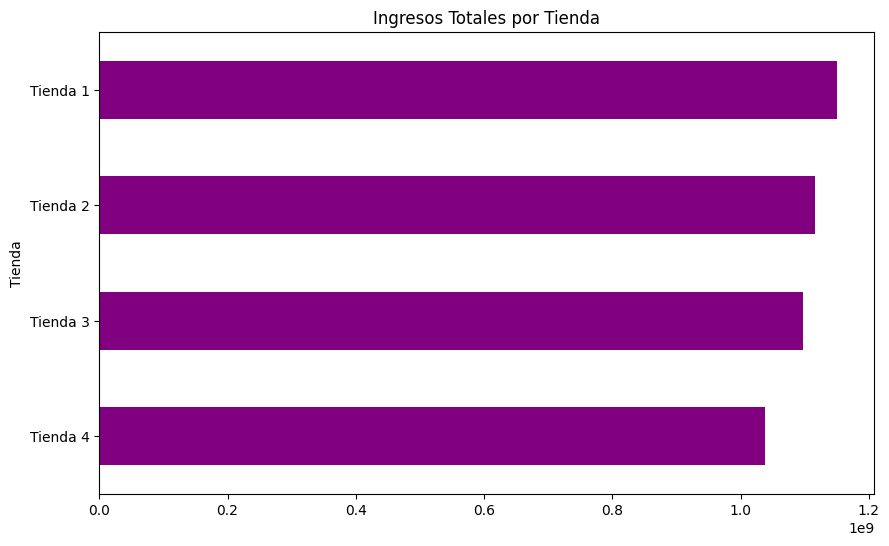

In [26]:
#6# Gráfico 1: Ingresos Totales por Tienda (Barras)

# Ordenamos los valores (sort_values) *(En millones)
ingresos_por_tienda_sorted = ingresos_por_tienda.sort_values()

# Creamos el gráfico de barras horizontales (barh)
ingresos_por_tienda_sorted.plot(
    kind='barh',
    figsize=(10, 6),
    color='purple',
    title='Ingresos Totales por Tienda'
)

<Axes: title={'center': 'Proporción de Ventas (Top 5 Categorías)'}>

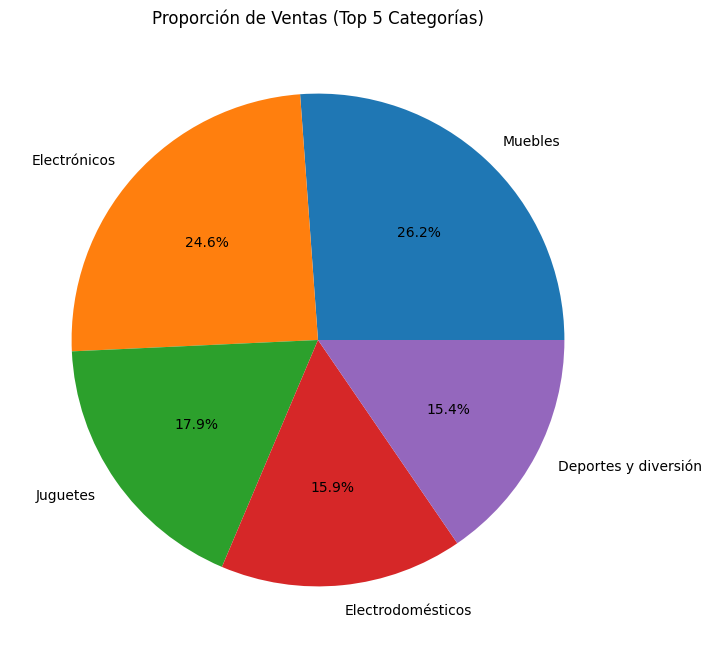

In [27]:
#6# Gráfico 2: Proporción de Ventas (Top 5 Categorías) (Circular)

# 1. Calculamos el total de ventas por categoría (usando df_total)
total_ventas_categoria = df_total.groupby('Categoría del Producto').size()

# 2. Ordenamos y nos quedamos con las 5 más vendidas
top_5_categorias = total_ventas_categoria.sort_values(ascending=False).head(5)

# 3. Graficamos
top_5_categorias.plot(
    kind='pie',
    figsize=(8, 8),
    title='Proporción de Ventas (Top 5 Categorías)',
    autopct='%1.1f%%' # 'autopct' muestra los porcentajes
)

<Axes: title={'center': 'Relación Precio vs. Costo de Envío (Muestra de 1000 ventas)'}, xlabel='Precio', ylabel='Costo de envío'>

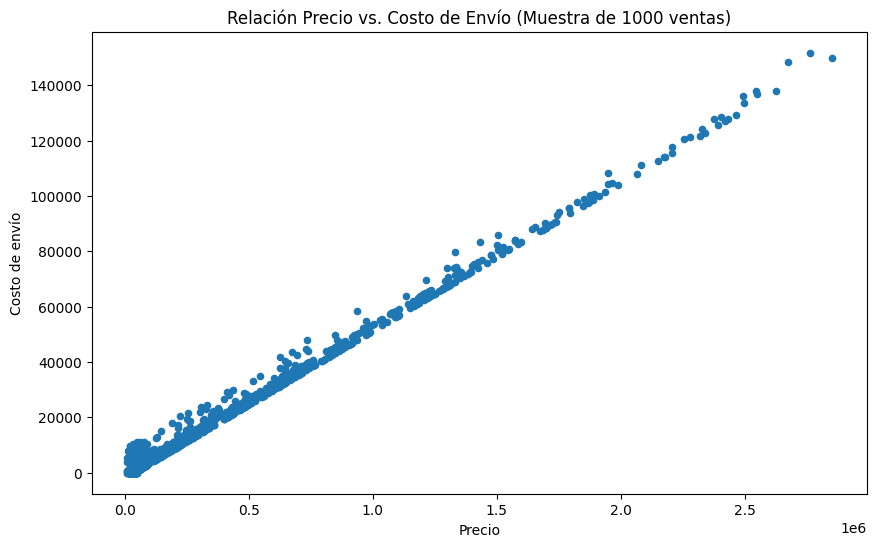

In [28]:
#6# Gráfico 3: Relación Precio vs Costo de Envío (Dispersión)

# Usamos una muestra (sample) de 1000 puntos para que el gráfico sea más rápido
df_sample = df_total.sample(n=1000, random_state=1)

# Graficamos la relación entre 'Precio' (eje x) y 'Costo de envío' (eje y)
df_sample.plot(
    kind='scatter',
    x='Precio',
    y='Costo de envío',
    figsize=(10, 6),
    title='Relación Precio vs. Costo de Envío (Muestra de 1000 ventas)'
)

# 3) Informe de Recomendación para el Sr. Juan

## Introducción

El propósito de este análisis fue evaluar el rendimiento de cuatro tiendas en línea para determinar cuál representa la mejor oportunidad de ventas para el Sr. Juan. La decisión se basa en un análisis comparativo de cinco métricas clave: ingresos totales, ventas por categoría, valoración media de clientes, productos más vendidos y costo de envío promedio.

## Desarrollo y Análisis de Datos

A continuación, se resumen los hallazgos principales de los ejercicios realizados:

**1. Ingresos Totales (Gráfico 1)**

El análisis de ingresos es el indicador más fuerte del tamaño del mercado. Los datos muestran una clara jerarquía:

* **Tienda 1:** $1,150,880,000 (Líder en ingresos)

* **Tienda 2:** $1,116,344,000

* **Tienda 3:** $1,098,020,000

* **Tienda 4:** $1,038,376,000

*Insight:* La Tienda 1 es la que genera el mayor volumen de ventas, superando a la Tienda 4 por más de $112 millones. Esto indica que tiene la mayor base de clientes activos.

**2. Valoración Media de Clientes (Ejercicio 3)**

La satisfacción del cliente es alta en todas las plataformas, con promedios muy cercanos a 4.0:
* **Tienda 3:** 4.04 (promedio)
* **Tienda 2:** 4.03 (promedio)
* **Tienda 4:** 3.99 (promedio)
* **Tienda 1:** 3.97 (promedio)

*Insight:* La diferencia entre la tienda con mejor (Tienda 3) y peor (Tienda 1) calificación es de solo 0.07 puntos. Todas las tiendas ofrecen un nivel de satisfacción excelente y casi idéntico. Este no es un factor decisivo.

**3. Costo de Envío Promedio (Ejercicio 5)**

Aquí sí encontramos diferencias significativas que impactan al cliente:

* **Tienda 4:** $23,459 (promedio)

* **Tienda 3:** $24,805 (promedio)

* **Tienda 2:** $25,216 (promedio)

* **Tienda 1:** $26,018 (promedio)

*Insight:* La Tienda 1 es la más cara para los clientes en términos de envío, siendo aproximadamente $2,500 más costosa que la Tienda 4. Esto es un punto en contra para la Tienda 1.

**4. Análisis de Productos y Categorías (Gráfico 2 y ejercicio 4)**

El gráfico circular (Gráfico 2) muestra que las categorías dominantes son **Muebles**, **Electrónicos** y **Juguetes**. Sin embargo, el análisis de productos específicos (Ejercicio 4) da un contexto más profundo:

* **Productos Más Vendidos:**
    * Tienda 1: Armario (60 ventas)
    * Tienda 4: Cama box (62 ventas)
    * **Ambos** son de la categoría "Muebles", confirmando su dominio.
    * Curiosamente, el más vendido de la Tienda 2 es "Iniciando en programación" (65 ventas), un producto de nicho (Libros) que se ha vuelto un best-seller en nuestra tienda.

* **Productos Menos Vendidos:**.
    * Tienda 2: Juego de mesa (32 ventas)
    * Tienda 3: Bloques de construcción (35 ventas)
    * Ambos pertenecen a la categoría "Juguetes", lo que sugiere que aunque la categoría es popular, tiene mucha competencia o productos que no se venden bien.

*Insight:* El mercado de "Muebles" es robusto y un pilar en las tiendas 1 y 4. El éxito de un libro en la Tienda 2 muestra que hay espacio para nichos.

## Conclusión y Recomendación

**Recomendación: Vender en la Tienda 1.**

**Justificación:**

La decisión se reduce a una compensación entre **Volumen de Mercado** y **Costos de Envío**.

1.  **Volumen de Mercado:** La **Tienda 1** es la líder indiscutible en ingresos. Para el Sr. Juan, esto representa el acceso al mayor grupo de compradores potenciales, lo cual es el factor más importante para un vendedor.

2.  **Desventaja (Costo de Envío):** Es cierto que la Tienda 1 tiene los costos de envío más altos. Sin embargo, su liderazgo en ventas demuestra que, hasta ahora, los clientes están dispuestos a pagar ese costo extra, probablemente debido a la confianza, el catálogo o el servicio de la plataforma.

Aunque la Tienda 4 es más barata en envíos, su mercado total es $112 millones más pequeño. Para maximizar la exposición y las ventas, el Sr. Juan debe priorizar la plataforma con más tráfico. La Tienda 1 ya ha demostrado un fuerte desempeño en categorías de alto valor como "Muebles" (Armario).

# ¡Extra! Análisis del desempeño geográfico

En este extra, se exploran las coordenadas geográficas de los datos de ventas para identificar patrones relacionados con la ubicación de las compras.
Por las cordenadas dadas, sabemos que es colombia, y las principales ventas son bogota, medillin y cali

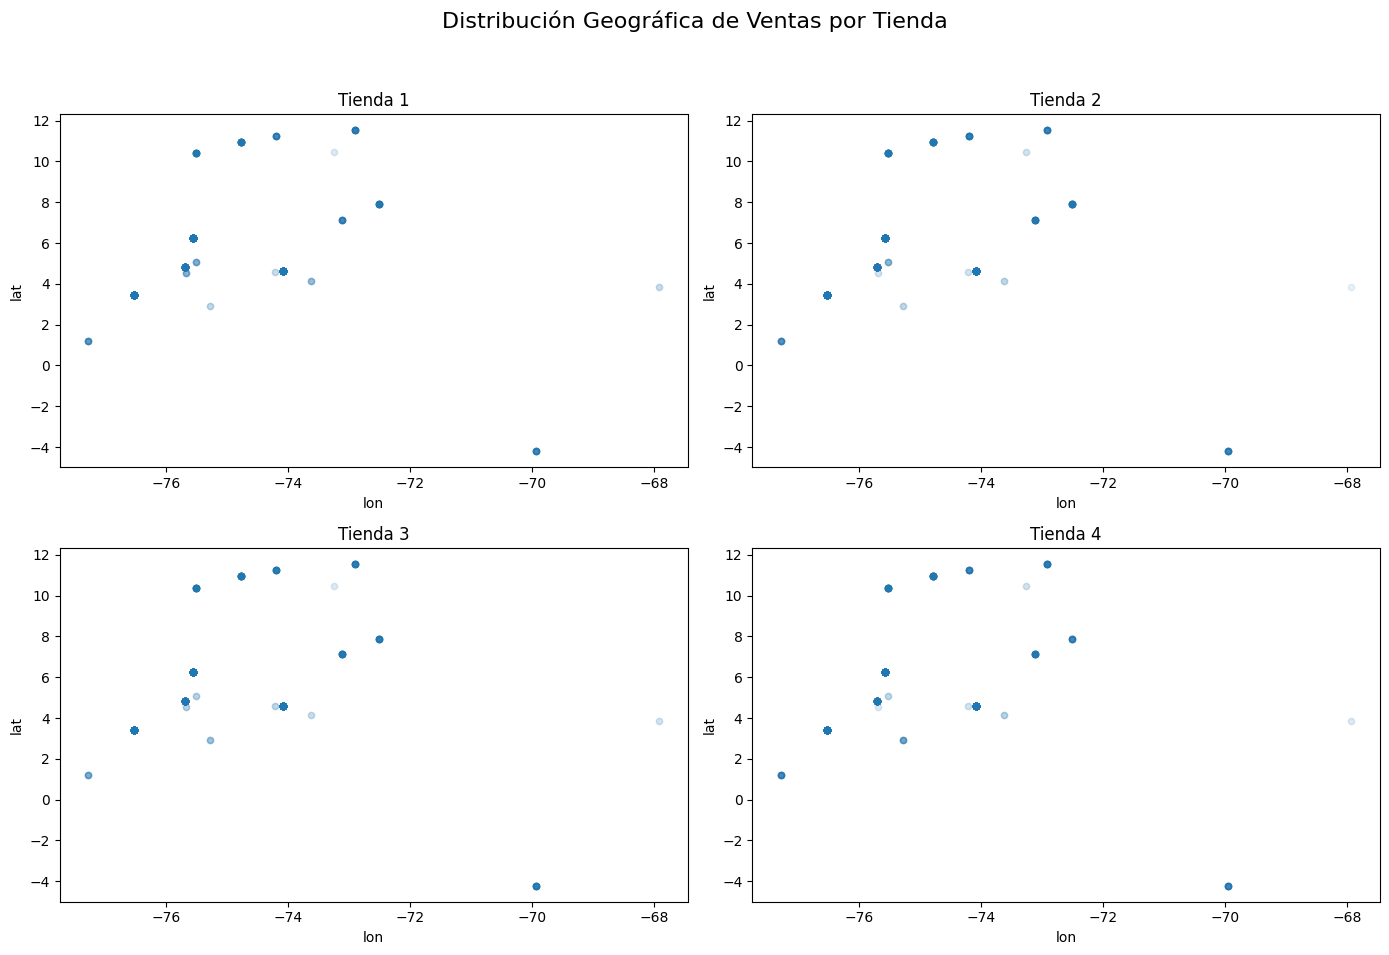

In [37]:
import matplotlib.pyplot as plt

# 1. Crear una figura y una cuadrícula de 2x2 subplots, uno por cada tienda
# (Esto nos da 4 'ejes' para dibujar: axes[0,0], axes[0,1], axes[1,0], axes[1,1])
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 2. Título general
fig.suptitle('Distribución Geográfica de Ventas por Tienda', fontsize=16)

# 3. Usar .plot() de pandas para dibujar en cada 'ax'
# Usamos 'alpha=0.05' para que los puntos sean semitransparentes
# y podamos ver las áreas de 'mayor concentración'

# Gráfico para Tienda 1 (arriba-izquierda)
df_total.query('Tienda == "Tienda 1"').plot(
    kind='scatter', x='lon', y='lat', title='Tienda 1', ax=axes[0,0], alpha=0.05
)

# Gráfico para Tienda 2 (arriba-derecha)
df_total.query('Tienda == "Tienda 2"').plot(
    kind='scatter', x='lon', y='lat', title='Tienda 2', ax=axes[0,1], alpha=0.05
)

# Gráfico para Tienda 3 (abajo-izquierda)
df_total.query('Tienda == "Tienda 3"').plot(
    kind='scatter', x='lon', y='lat', title='Tienda 3', ax=axes[1,0], alpha=0.05
)

# Gráfico para Tienda 4 (abajo-derecha)
df_total.query('Tienda == "Tienda 4"').plot(
    kind='scatter', x='lon', y='lat', title='Tienda 4', ax=axes[1,1], alpha=0.05
)

# 4. Ajustar el layout para que no se superpongan
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [34]:
# --- Cálculo de lugares de compra más frecuentes ---
print("--- Lugares de Compra Más Frecuentes ---")

# Usamos value_counts() en la columna 'Lugar de Compra' para contar las ocurrencias
frecuencia_lugares = df_total['Lugar de Compra'].value_counts()

# Mostramos los 5 lugares más frecuentes
print(frecuencia_lugares.head())

--- Lugares de Compra Más Frecuentes ---
Lugar de Compra
Bogotá          3943
Medellín        2314
Cali            1007
Pereira          517
Barranquilla     310
Name: count, dtype: int64


<Axes: title={'center': 'Top 5 Lugares de Compra Frecuentes'}, xlabel='Lugar de Compra'>

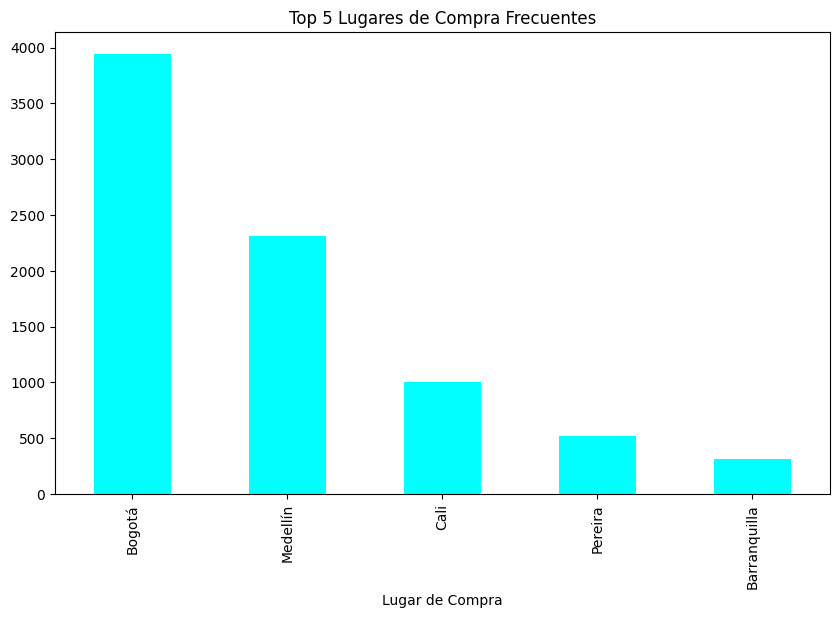

In [35]:
# Gráfico de los 5 lugares más frecuentes
frecuencia_lugares.head(5).plot(
    kind='bar',
    figsize=(10, 6),
    title='Top 5 Lugares de Compra Frecuentes',
    color='cyan'
)

# Análisis de Resultados Geográficos

Al observar los cuatro gráficos de dispersión, podemos sacar una conclusión muy clara:

**No existe una diferencia geográfica significativa entre las tiendas.**

Todas las cuatro tiendas operan a nivel nacional y su "huella" de ventas es prácticamente idéntica. Las áreas de mayor concentración de ventas (los puntos más oscuros en el gráfico) coinciden con las principales áreas metropolitanas del país (como Bogotá y Medellín) para las cuatro tiendas por igual.

Esto refuerza la recomendación final: dado que todas las tiendas compiten en las mismas ubicaciones y tienen perfiles de clientes geográficamente idénticos, la mejor opción es la **Tienda 1**, simplemente porque ha logrado capturar la mayor parte de este mercado compartido.

Mi conclusión no es que la geografía no sea importante, sino que no es un factor decisivo para elegir entre estas cuatro tiendas.

Si miras los cuatro gráficos (Tienda 1, Tienda 2, Tienda 3 y Tienda 4), notarás que son casi idénticos:

* **Mismas Áreas de Concentración**: Todas las tiendas muestran una gran concentración de ventas en los mismos puntos (seguramente las ciudades principales como Bogotá, Medellín, etc.).

* **Misma Dispersión**: Todas tienen ventas esparcidas por el resto del territorio de forma muy similar.

No hay un escenario donde, por ejemplo, la "Tienda 1" domine el norte del país y la "Tienda 2" domine el sur. Todas compiten exactamente en las mismas regiones.

Como todas pescan en la misma "laguna" geográfica, mi recomendación se basa en el otro dato clave: la Tienda 1 es la que saca más "peces" (más ventas) de esa misma laguna.